# Board Representation and Visualisation using Arrays

This notebook defines a board representation based on [this guide](https://www.redblobgames.com/grids/hexagons/) and provides code for visualising the layout.

The board representation is defined using Numpy arrays in a way that should be able to passed as input to a CNN.

## Install Dependencies

The following dependencies are required to run this notebook (in addition to PyTorch).

In [1]:
%%bash

# pip install numpy
# pip install matplotlib
# pip install hexagdly

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

import torch
import hexagdly

## Define and Visualise the Board Representation

The board is represented as a $4 \times (2N - 1) \times (2N - 1)$ array, where each channel stores the locations of pieces of a specific colour and each index $(c, q, r)$ represents a cell with [axial coordinates](https://www.redblobgames.com/grids/hexagons/#coordinates-axial) $(q, r)$.

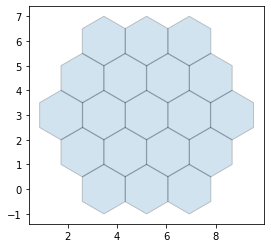

In [3]:
def generate_board(n):
    """Generate a 2D array that stores the position and state
    of each cell in axial coordinates.
    """
    board = np.zeros((4, 2*n - 1, 2*n - 1))

    return board

def axial_to_pixel(q, r):
    """Convert axial coordinates to pixel (i.e. cartesian
    coordinates).
    """
    x = np.sqrt(3) * q  +  np.sqrt(3) / 2 * r
    y = 3 / 2 * r
    return x, y

def draw_board(board):
    """Visualise the board using matplotlib.
    """
    n = (board.shape[-1] + 1) / 2

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    for q in range(0, board.shape[-1]):
        for r in range(0, board.shape[-1]):
            if (q + r >= n - 1) and (4*n - 4 - q - r >= n - 1):
                x, y = axial_to_pixel(q, r)
                hexagon = RegularPolygon((x, y), numVertices=6, radius=1.75*np.sqrt(1/3), alpha=0.2, edgecolor='k', facecolor='C0')
                ax.add_patch(hexagon)

    #         # Uncomment to draw illegal cells (in a different colour)    
    #         else:
    #             x, y = axial_to_pixel(q, r)
    #             hexagon = RegularPolygon((x, y), numVertices=6, radius=1.75*np.sqrt(1/3), alpha=0.2, edgecolor='k', facecolor='C1')
    #             ax.add_patch(hexagon)

    plt.autoscale(enable = True)
    plt.show()
    
board = generate_board(n=3)
draw_board(board)